In [1]:
#imports
import matplotlib as mpl
import calmap
import calplot
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from pprint import pprint

In [2]:
#read csvs with airport data

summary2015 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2015.csv')
summary2016 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2016.csv')
summary2017 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2017.csv')
summary2018 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2018.csv')

summary1 = summary2015.append(summary2016)
summary2 = summary1.append(summary2017)
summary = summary2.append(summary2018)

In [3]:
#adding index to df
summary_date = summary.set_index('Date', inplace=True)
summary_date = summary.index = pd.to_datetime(summary.index)

In [4]:
#isolating cancelled flights due to weather

cancelled = summary.loc[summary["Weather Delay"] == "CANCELLED"]
cancelled = cancelled.drop(columns=['Destination', 'Expected Departure Time', 'Expected Arrival Time', 'Distance'])

In [5]:
#capturing flights that were not cancelled

non_cancelled = summary.loc[summary["Weather Delay"] != "CANCELLED"]
non_cancelled = non_cancelled.drop(columns=['Destination', 'Expected Departure Time', 'Expected Arrival Time', 'Distance'])

In [6]:
#snapshot cancelled by airport, sampled by day, and reset index to merge

dfw_c = cancelled.loc[cancelled["Origin"] == "DFW"].resample('D').count().reset_index()
atl_c = cancelled.loc[cancelled["Origin"] == "ATL"].resample('D').count().reset_index()
den_c = cancelled.loc[cancelled["Origin"] == "DEN"].resample('D').count().reset_index()
lax_c = cancelled.loc[cancelled["Origin"] == "LAX"].resample('D').count().reset_index()
oha_c = cancelled.loc[cancelled["Origin"] == "ORD"].resample('D').count().reset_index()

In [7]:
dfw_nc = non_cancelled.loc[non_cancelled["Origin"] == "DFW"].resample('D').count().reset_index()
atl_nc = non_cancelled.loc[non_cancelled["Origin"] == "ATL"].resample('D').count().reset_index()
den_nc = non_cancelled.loc[non_cancelled["Origin"] == "DEN"].resample('D').count().reset_index()
lax_nc = non_cancelled.loc[non_cancelled["Origin"] == "LAX"].resample('D').count().reset_index()
oha_nc = non_cancelled.loc[non_cancelled["Origin"] == "ORD"].resample('D').count().reset_index()

In [8]:
#combining data for totals data set 

daily_cancels = cancelled.resample('D').count()
daily_nc = non_cancelled.resample('D').count()
daily_cancels = daily_cancels["Weather Delay"].reset_index()
daily_nc = daily_nc["Weather Delay"].reset_index()

daily_summed = pd.merge(daily_cancels, daily_nc, on="Date")
daily_summed = daily_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

daily_summed["Total Flights"] = daily_summed["# Cancelled Flights"] + daily_summed["# Non-Cancelled Flights"]
daily_summed["Cancel Rate (%)"] = (daily_summed["# Cancelled Flights"] / daily_summed["Total Flights"]) * 100

daily_summed['Date'] = pd.to_datetime(daily_summed['Date'])

daily_summed = daily_summed.set_index('Date')

daily_summed.head()

,# Cancelled Flights,# Non-Cancelled Flights,Total Flights,Cancel Rate (%)
Date,,,,
2015-01-01,168,3167,3335,5.037481
2015-01-02,36,3863,3899,0.923314
2015-01-03,28,3510,3538,0.791408
2015-01-04,63,3722,3785,1.664465
2015-01-05,52,3705,3757,1.384083


In [12]:
dfw_summed = pd.merge(dfw_c, dfw_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
dfw_summed = dfw_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

dfw_summed["Total Flights"] = dfw_summed["# Cancelled Flights"] + dfw_summed["# Non-Cancelled Flights"]
dfw_summed["Cancel Rate (%)"] = (dfw_summed["# Cancelled Flights"] / dfw_summed["Total Flights"]) * 100

dfw_summed = dfw_summed.set_index('Date')
dfw_summed.max()

# Cancelled Flights        480.000000
# Non-Cancelled Flights    869.000000
Total Flights              878.000000
Cancel Rate (%)             68.218299
dtype: float64

In [10]:
atl_summed = pd.merge(atl_c, atl_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
atl_summed = atl_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

atl_summed["Total Flights"] = atl_summed["# Cancelled Flights"] + atl_summed["# Non-Cancelled Flights"]
atl_summed["Cancel Rate (%)"] = (atl_summed["# Cancelled Flights"] / atl_summed["Total Flights"]) * 100

atl_summed = atl_summed.set_index('Date')
atl_summed.max()

# Cancelled Flights         536.000000
# Non-Cancelled Flights    1217.000000
Total Flights              1230.000000
Cancel Rate (%)              53.340185
dtype: float64

In [13]:
den_summed = pd.merge(den_c, den_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
den_summed = den_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

den_summed["Total Flights"] = den_summed["# Cancelled Flights"] + den_summed["# Non-Cancelled Flights"]
den_summed["Cancel Rate (%)"] = (den_summed["# Cancelled Flights"] / den_summed["Total Flights"]) * 100

den_summed = den_summed.set_index('Date')
den_summed.max()

# Cancelled Flights        596.000000
# Non-Cancelled Flights    741.000000
Total Flights              742.000000
Cancel Rate (%)             95.512821
dtype: float64

In [14]:
lax_summed = pd.merge(lax_c, lax_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
lax_summed = lax_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

lax_summed["Total Flights"] = lax_summed["# Cancelled Flights"] + lax_summed["# Non-Cancelled Flights"]
lax_summed["Cancel Rate (%)"] = (lax_summed["# Cancelled Flights"] / lax_summed["Total Flights"]) * 100

lax_summed = lax_summed.set_index('Date')
lax_summed.max()

# Cancelled Flights         53.000000
# Non-Cancelled Flights    675.000000
Total Flights              675.000000
Cancel Rate (%)             10.697674
dtype: float64

In [15]:
ord_summed = pd.merge(oha_c, oha_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
ord_summed = ord_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

ord_summed["Total Flights"] = ord_summed["# Cancelled Flights"] + ord_summed["# Non-Cancelled Flights"]
ord_summed["Cancel Rate (%)"] = (ord_summed["# Cancelled Flights"] / ord_summed["Total Flights"]) * 100

ord_summed = ord_summed.set_index('Date')
ord_summed.max()

# Cancelled Flights         505.000000
# Non-Cancelled Flights    1023.000000
Total Flights              1023.000000
Cancel Rate (%)              76.218324
dtype: float64

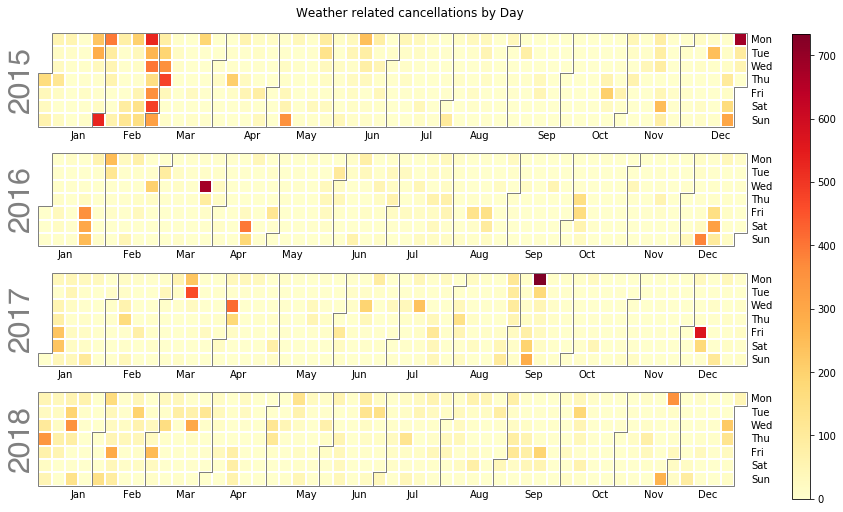

In [14]:
#totals map
totals = pd.Series(daily_summed["# Cancelled Flights"]).astype(float)
totals.head()

calplot.calplot(data=totals, cmap='YlOrRd', how=None, yearlabels=True, yearascending=True, 
                subplot_kws=None, gridspec_kws=None, figsize=None, 
                fig_kws=None, colorbar=None, suptitle="Weather related cancellations by Day", 
                suptitle_kws=None, tight_layout=True )

plt.savefig('../Plot Images/all_airports_wc_daily.png')
plt.show()

#calmap.calendarplot(totals, yearlabels=True, yearascending=True, yearlabel_kws=None, subplot_kws=None, gridspec_kws=None, fig_kws=None, **kwargs)

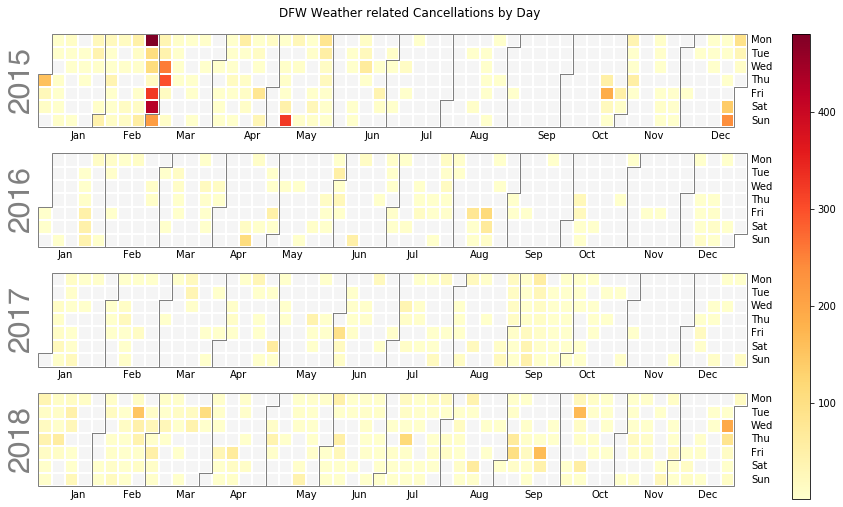

In [15]:
dfwtotals = pd.Series(dfw_summed["# Cancelled Flights"]).astype(float)

calplot.calplot(data=dfwtotals, cmap='YlOrRd', how=None, yearlabels=True, yearascending=True, 
                subplot_kws=None, gridspec_kws=None, figsize=None, 
                fig_kws=None, colorbar=None, suptitle="DFW Weather related Cancellations by Day", 
                suptitle_kws=None, tight_layout=True )

plt.savefig('../Plot Images/DFW_wc_daily.png')
plt.show()

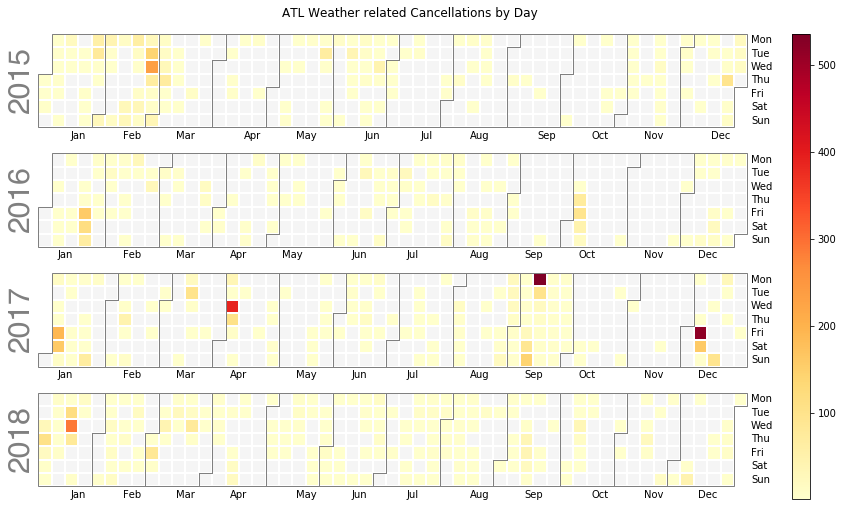

In [16]:
atltotals = pd.Series(atl_summed["# Cancelled Flights"]).astype(float)

calplot.calplot(data=atltotals, cmap='YlOrRd', how=None, yearlabels=True, yearascending=True, 
                subplot_kws=None, gridspec_kws=None, figsize=None, 
                fig_kws=None, colorbar=None, suptitle="ATL Weather related Cancellations by Day", 
                suptitle_kws=None, tight_layout=True )

plt.savefig('../Plot Images/ATL_wc_daily.png')
plt.show()

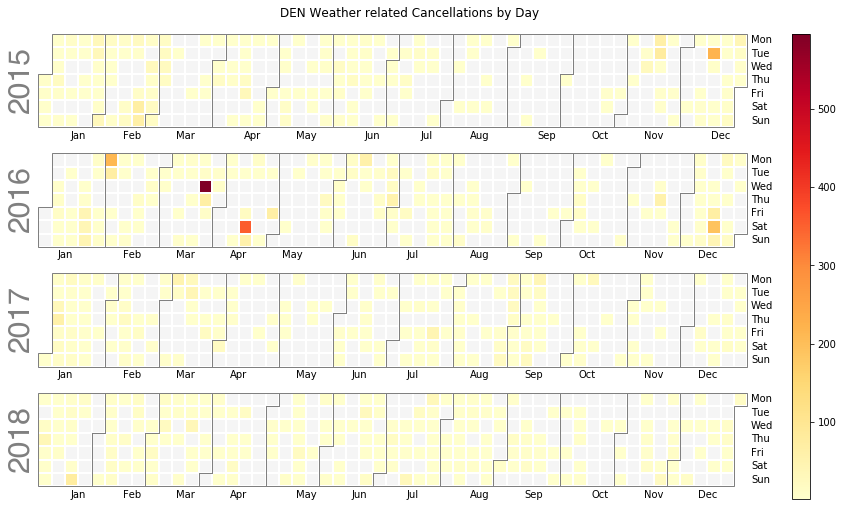

In [17]:
dentotals = pd.Series(den_summed["# Cancelled Flights"]).astype(float)

calplot.calplot(data=dentotals, cmap='YlOrRd', how=None, yearlabels=True, yearascending=True, 
                subplot_kws=None, gridspec_kws=None, figsize=None, 
                fig_kws=None, colorbar=None, suptitle="DEN Weather related Cancellations by Day", 
                suptitle_kws=None, tight_layout=True )

plt.savefig('../Plot Images/DEN_wc_daily.png')
plt.show()

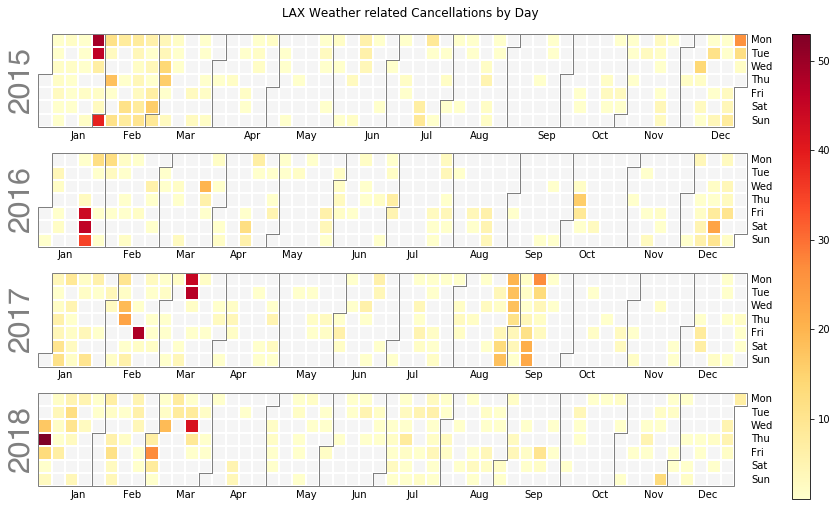

In [18]:
laxtotals = pd.Series(lax_summed["# Cancelled Flights"]).astype(float)

calplot.calplot(data=laxtotals, cmap='YlOrRd', how=None, yearlabels=True, yearascending=True, 
                subplot_kws=None, gridspec_kws=None, figsize=None, 
                fig_kws=None, colorbar=None, suptitle="LAX Weather related Cancellations by Day", 
                tight_layout=True)

plt.savefig('../Plot Images/LAX_wc_daily.png')
plt.show()

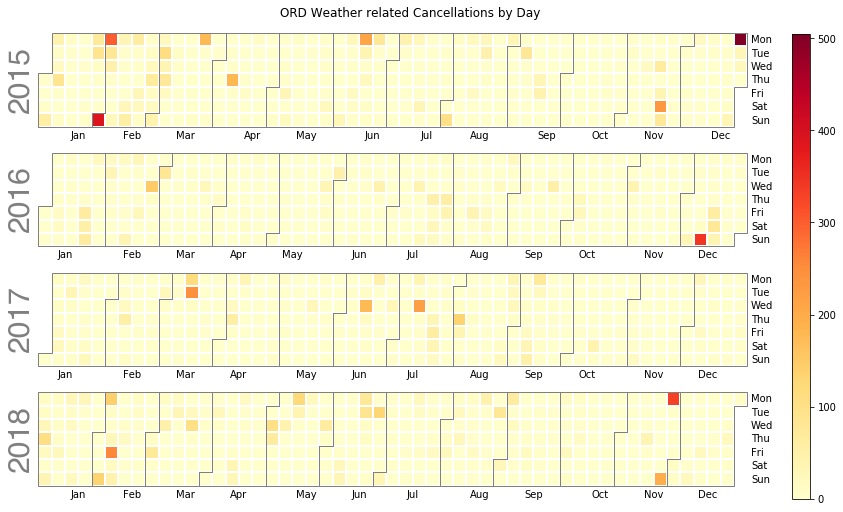

In [19]:
ordtotals = pd.Series(ord_summed["# Cancelled Flights"]).astype(float)

calplot.calplot(data=ordtotals, cmap='YlOrRd', how=None, yearlabels=True, yearascending=True, 
                subplot_kws=None, gridspec_kws=None, figsize=None, 
                fig_kws=None, colorbar=None, suptitle="ORD Weather related Cancellations by Day", 
                suptitle_kws=None, tight_layout=True )

plt.savefig('../Plot Images/ORD_wc_daily.png')
plt.show()